In [90]:
import numpy as np
import random as rand
import matplotlib.pyplot as plt

In [2]:
def valor_acao(n):#calcula o valor do contrato no tempo n
    v=[]
    for i in range (n+1):
        v.append(1000 + 30 * (n-i) - 30 * i)
    return v          

In [152]:
 valor_acao() , valor_acao(4) , valor_acao(0) #comparando com cálculos feitos a mão


([1900,
  1840,
  1780,
  1720,
  1660,
  1600,
  1540,
  1480,
  1420,
  1360,
  1300,
  1240,
  1180,
  1120,
  1060,
  1000,
  940,
  880,
  820,
  760,
  700,
  640,
  580,
  520,
  460,
  400,
  340,
  280,
  220,
  160,
  100],
 [1120, 1060, 1000, 940, 880],
 [1000])

In [4]:
def recurssao_acao(v): #recurssão dos valores do contrato v
    v_new=[]
    for i in range(len(v)-1):
        v_i=v[i]-30
        v_new.append(v_i)
    return v_new

In [35]:
 assert recurssao_acao(valor_acao(5)) == valor_acao(4)#comparando com cálculos feitos a mão

In [6]:
def valor_juros(j):#calculamos a taxa de juros no tempo n
    r=[]
    r.append(0.01 * (j/(j+1)) + 0.002)
    r.append(0.01 * (j/(j+1)) - 0.002)
    if j==0:
        r=[0,0]
    return r

In [7]:
valor_juros(5) #testanto os valores 

[0.010333333333333333, 0.006333333333333333]

In [8]:
 def arbitragem_verific(n):
    for k in range (n,0,-1):   
        futuro = valor_acao(k)
        atual = recurssao_acao(futuro)
        r= valor_juros(k-1)

        for j in range(len(atual)-1,-1,-1):

            if j==(0): #caso da extremidade onde temos apenas up, logo utilizamos apenas um r 
                u = futuro[j] / atual[j]
                d = futuro[j+1] / atual[j]
                assert d < (1+r[0]) and (1+r[0]) < u

            if j==(len(atual)-1): #caso da extremidade onde temos apenas down, logo utilizamos apenas um r
                u = futuro[j] / atual[j]
                d = futuro[j+1] / atual[j]
                assert d < (1+r[1]) and  (1+r[1]) < u

            else: #resto dos casos      
                u = futuro[j] / atual[j]
                d = futuro[j+1] / atual[j]
                assert d < 1+r[0] and 1+r[0] < u and d < (1+r[1]) and  (1+r[1]) < u
                

In [153]:
arbitragem_verific(30)


In [169]:
def gerador_de_caminhos(n , S_0):#função para plotar gráfico
    max_ways , a = 100 , 0 
    lista=[]
    while a < max_ways:# fazendo caminhos aleatórios para calcularmos valores da opção
        s=[S_0]
        discount = 1
        r = 0
        S = S_0
        u , d = (S_0 + 30) / S_0 , (S_0 - 30) / S_0
        for i in range (n):
            p_neutral= ((1 + r) - d) / (u - d)
            q_neutral= 1 - p_neutral
            discount = discount/(1+r)
            
            if rand.random() < p_neutral: # geramos um número aleatório, uma espécie de sorteio para decidir se teremos up ou down no caminho
                S , r = S + 30 , 0.01 * (i / (i+1)) + 0.002
                s.append(S)
            else:
                S , r = S - 30 , 0.01 * (i / (i+1)) - 0.002
                s.append(S)
        lista.append(s)
        a += 1
    return(lista)

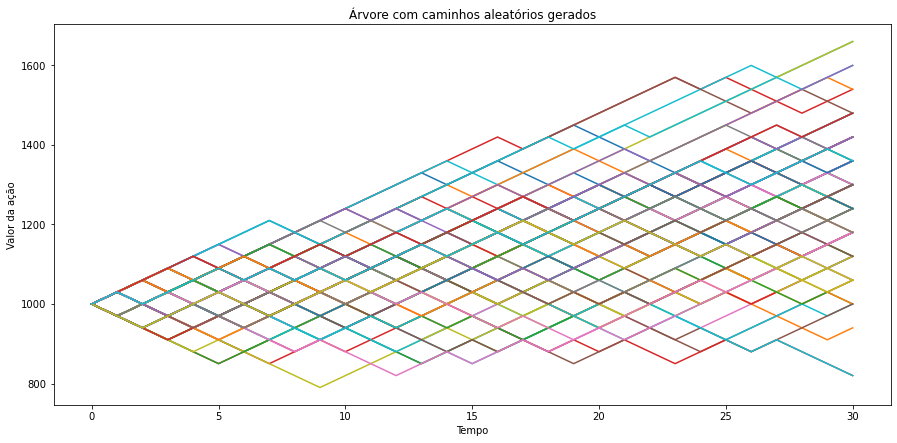

In [170]:
plt.figure(figsize=(15, 7)) 
for i in (gerador_de_caminhos(30 , 1000)):
    tempo=[j for j in range(len(i))]
    plt.plot( tempo, i ,'-')

plt.xlabel('Tempo')
plt.ylabel('Valor da ação')
plt.title('Árvore com caminhos aleatórios gerados')
ax = plt.gca()
plt.show()
        

In [188]:
def metodo_montecarlo(S_0, strike, n ): # utilizaremos a media do valor das opções em n caminhos diferentes 
    max_ways , soma_options, a  = 10000 , 0 , 0 

    while a < max_ways:# fazendo caminhos aleatórios para calcularmos valores da opção
        discount = 1
        r = 0
        k=0
        S = S_0
        u , d = (S_0 + 30) / S_0 , (S_0 - 30) / S_0
        for i in range (n):
            p_neutral= ((1 + r) - d) / (u - d)
            q_neutral= 1 - p_neutral
            discount = discount/(1+r)
            
            if rand.random() < p_neutral: # geramos um número aleatório, uma espécie de sorteio para decidir se teremos up ou down no caminho
                S , r = S + 30 , 0.01 * (i / (i+1)) + 0.002
               
            else:
                S , r = S - 30 , 0.01 * (i / (i+1)) - 0.002
               
        a += 1
        soma_options += discount*(max(0, S - strike)) # escolhemos um call como opção, aqui calculamos o valor dele com o desconto calculado   
    return (soma_options / a) # média do valor das opções    

SyntaxError: invalid syntax (<ipython-input-188-fc0d3f8e9797>, line 23)

In [187]:
metodo_montecarlo(1000, 900 , 30 )

1900


287.90064927120534

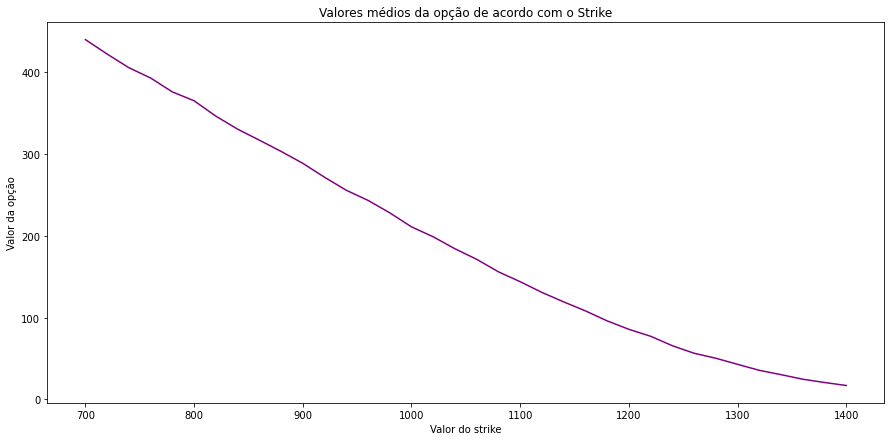

In [158]:
valores_strike=[]
optionv=[]
for i in range (700, 1401, 20):
    valores_strike.append(i)
    optionv.append(metodo_montecarlo(1000, i , 30 ))

plt.figure(figsize=(15, 7))
plt.plot(valores_strike, optionv ,'-', color = 'purple')
plt.xlabel('Valor do strike')
plt.ylabel('Valor da opção')
plt.title('Valores médios da opção de acordo com o Strike')
ax = plt.gca()
plt.show()
    

In [171]:
def metodo_montecarlo_barreira(S_0, strike , barreira , n ): # utilizaremos a media do valor das opções em n caminhos diferentes 
    max_ways , soma_options, a  = 10000 , 0 , 0 

    while a < max_ways:# fazendo caminhos aleatórios para calcularmos valores da opção
        discount = 1
        r = 0
        S = S_0
        u , d = (S_0 + 30) / S_0 , (S_0 - 30) / S_0
        for i in range (n):
            p_neutral= ((1 + r) - d) / (u - d)
            q_neutral= 1 - p_neutral
            discount = discount/(1+r)
            
            if rand.random() < p_neutral: # geramos um número aleatório, uma espécie de sorteio para decidir se teremos up ou down no caminho
                S , r = S + 30 , 0.01 * (i / (i+1)) + 0.002
                if S > barreira: # Devemos verificar sempre se S ultrapassou a barreira. Se sim, este caminho teve o payoff zerado.
                    S=0
                    break
            else:
                S , r = S - 30 , 0.01 * (i / (i+1)) - 0.002
        print(S)
        a += 1
        soma_options += discount*(max(0, S - strike)) # escolhemos um call como opção, aqui calculamos o valor dele com o desconto calculado  
    return (soma_options / a) # média do valor das opções    

In [160]:
metodo_montecarlo_barreira(1000, 1200 , 1000 , 30 )#verificando se o algoritmo da barreira esta funcionando, utilizei uma barreira igual ao valor 

0.0

In [161]:
metodo_montecarlo_barreira(1000, 900 , 1500 , 30 )

226.47605880084154

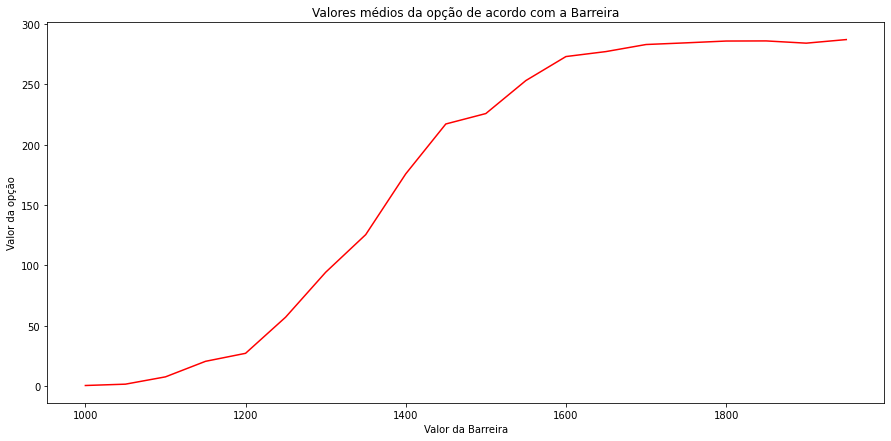

In [162]:
valores_barreira=[]
optionv=[]
for i in range (1000, 2000, 50):
    valores_barreira.append(i)
    optionv.append(metodo_montecarlo_barreira(1000, 900 , i , 30 ))

plt.figure(figsize=(15, 7))
plt.plot(valores_barreira, optionv ,'-', color = 'red')
plt.xlabel('Valor da Barreira')
plt.ylabel('Valor da opção')
plt.title('Valores médios da opção de acordo com a Barreira')
ax = plt.gca()
plt.show()

In [165]:
def metodo_montecarlo_lookback(S_0, n ): # utilizaremos a media do valor das opções em n caminhos diferentes 
    max_ways , soma_options, a  = 10000 , 0 , 0 

    while a < max_ways:# fazendo caminhos aleatórios para calcularmos valores da opção
        discount = 1
        r = 0
        S = S_0
        S_max = S_0
        S_min = 0
        u , d = (S_0 + 30) / S_0 , (S_0 - 30) / S_0
        for i in range (n):
            p_neutral= ((1 + r) - d) / (u - d)
            q_neutral= 1 - p_neutral
            discount = discount/(1+r)
            
            if rand.random() < p_neutral: # geramos um número aleatório, uma espécie de sorteio para decidir se teremos up ou down no caminho
                S , r = S + 30 , 0.01 * (i / (i+1)) + 0.002#só é possível termos um valor máximo caso ocorra um down, por isso verificamos o ,máximo neste caso
                if S > S_max:
                    S_max = S
            
            else:
                S , r = S - 30 , 0.01 * (i / (i+1)) - 0.002 #só é possível termos um valor mínimo caso ocorra um down, por isso verificamos o mínimo neste caso
                if S < S_min:
                    S_min = S
        a += 1
        soma_options += discount*(max(0, S_max - S_min)) # escolhemos um lookback como opção, aqui calculamos o valor dele com o desconto calculado  
    return (str('O valor aproximado da opção é: '+str(soma_options / a))) # média do valor das opções    

In [166]:
metodo_montecarlo_lookback(1000, 30)

'O valor aproximado da opção é: 992.0615126764274'